# Acknowledgement

Parts of this pset were inspired by
* Berkeley CS294-158, taught by Pieter Abbeel, Wilson Yan, Kevin Frans, and Philipp Wu;
* MIT 6.S184/6.S975, taught by Peter Holderrieth and Ezra Erives;
* The [blog post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) about diffusion models by Lilian Weng.




# Submission Guideline for Part 2

Please include your answer to all problems, including formulas, proofs, and the figures generated in each problem, excluding code. You are required to submit the (single) pdf and all (four) notebooks (one for each problem) with your code and running outputs. Do not include code in the pdf file. 

Specifically, for Problem 1 in this notebook, the pdf should contain:
- Formulas and proofs for problem 1.1 and 1.2
- 4 figures, one for each beta schedule for problem 1.3
- Answers to the 2 short answer questions about different beta schedules in problem 1.3

# Problem 1: Preliminary and Math Preparations
In this problem, we will revisit some of the essential math derivations of diffusion models from the probabilistic perspective (referring to the [DDPM; Ho *et al.*, 2020](https://arxiv.org/pdf/2006.11239) paper). You will not need to use GPUs for this problem.

*Hint*: a careful reading of the [blog post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) by Lilian Weng should reveal all of these questions

## 1.1 Diffusion Forward Process
Denote the target data distribution as $q(x)$. For each data point $x_0 \sim q(x)$, we can define a forward diffusion process where Gaussian noises are added to the sampling over $T$ steps as a Markov chain with a variance schedule $\beta_1,...,\beta_T \, (\beta_i\in (0,1), \forall \, i\in \{1,...,T\})$. This leads to $T$ latent variables $x_1,...,x_T$ following the distribution $q(x_{1:T}|x_0)$, defined as:
$$q(x_{1:T}|x_0):=\prod_{t=1}^T q(x_t|x_{t-1}), \ \ q(x_t|x_{t-1}):= \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1},\beta_t \mathbf{I})$$

Let $\alpha_t:=1-\beta_t$ and $\bar{\alpha_t}:=\prod_{i=1}^t \alpha_i$. Please fill in the formula of distributions below with a brief proof:

(1) $q(x_t|x_0)$ = 

*Hint*: 
- One proof approach involves using the [reparameterization trick](https://en.wikipedia.org/wiki/Reparameterization_trick), i.e. normal distribution $z \sim N(\mu,\sigma^2)$ can be written as $z=\mu+\sigma \epsilon$, where $\epsilon\sim N(0,1)$ is a standard normal distribution.
- The summation of two Gaussians, $\mathcal{N}(\mu_1,\sigma_1^2 \mathbf{I})$ and $\mathcal{N}(\mu_2,\sigma_2^2 \mathbf{I})$, has the distribution $\mathcal{N}(\mu_1+\mu_2,(\sigma_1^2+\sigma_2^2) \mathbf{I})$.

(2) $\lim_{T \rightarrow \infty} q(x_T)$ = 

(You only need to consider normal schedules $\{\beta_t\}_{t=1}^T$, i.e. you can assume that there exists infinite number of $t$ such that $\beta_t>c$ where $c$ is a constant and $c>0$.)

## 1.2 Reverse Diffusion Process
By reversing the above process and sample from $q(x_{t-1}|x_t)$, we can get samples from the target data distribution $q(x_0)$ by sampling from the simple distribution $q(x_T)$. However, the distribution is not directly tractable, and we need to train a model to approximate the conditional probabilities.

However, the reverse probability is *tractable* when *conditioned on $x_0$*:
$$q(x_{t-1}|x_t,x_0)=\mathcal{N}(x_{t-1};\tilde{\mu}_t(x_t,x_0), \tilde{\beta_t} \mathbf{I})$$

Please fill in the formula of distributions below with a brief proof. Write the formulas using (part of) the variables $\alpha_t$, $\alpha_{t-1}$, $\beta_t$, $\beta_{t-1}$,  $\bar{\alpha_t}$, $\bar{\alpha}_{t-1}$ and simplify the expression as much as you can. 

*Hint* for (3) and (4): use the Bayes' theorem.

(3) $\tilde{\beta_t}$ = 

(4) Denote $\tilde{\mu}_t(x_t,x_0)=A \cdot x_t + B \cdot x_0$, then $A$ = ; $B$ = 

(5) Using the distribution derived in (1) and the reparameterization trick, express $x_0$ as a combination $x_t$ and a Gaussian noise $\epsilon_t$: $x_0$ =

(6) Using the expression of $x_0$ in (5) to replace the $x_0$ in (4), $\tilde{\mu}_t$ can be written as a combination of $x_t$ and $\epsilon_t$: $\tilde{\mu}_t(x_t,\epsilon_t) = A' \cdot x_t + B' \cdot \epsilon_t$. Then $A'$ = ; $B'$ = 

## 1.3 Analyzing Different Variance Schedules
The variance schedule is one of the essential components to design for diffusion models. For (1) linear ($\beta_t=t/T$), (2) polynomial ($\beta_t=(t/T)^3$) (3) cosine ($\beta_t=1-cos(\frac{\pi}{2}\cdot \frac{t}{T})$) schedules of $\beta_t$ respectivaly, generate plots with y-axis being the value of $\beta_t$ and $1-\bar{\alpha_t}$ and x-axis being the diffusion step $t/T$ and use $T=30$. Comparing the two schedules and based on the formula of $q(x_t|x_0)$ in (1), what can you say about their impact to the diffusion training?

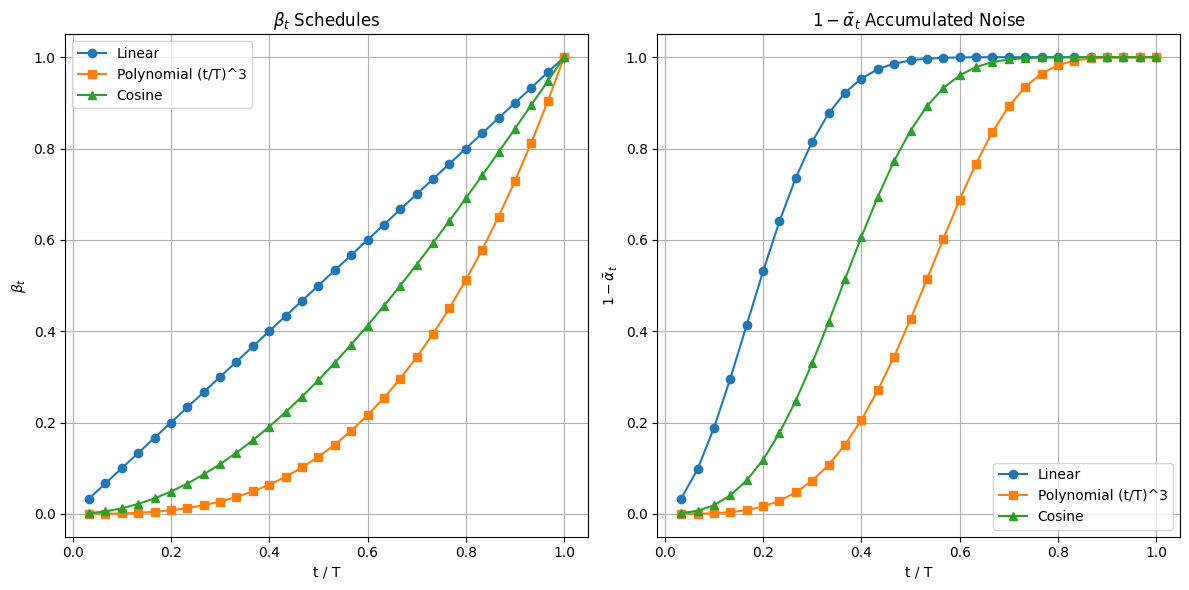

In [1]:
### write your code here
import numpy as np
import matplotlib.pyplot as plt

T = 30
timesteps = np.arange(1, T + 1)
t_over_T = timesteps / T


beta_linear = t_over_T
beta_poly = t_over_T ** 3
beta_cosine = 1 - np.cos((np.pi / 2) * t_over_T)


def compute_bar_alpha(beta):
    alpha = 1 - beta
    bar_alpha = np.cumprod(alpha)
    return 1 - bar_alpha  


one_minus_bar_alpha_linear = compute_bar_alpha(beta_linear)
one_minus_bar_alpha_poly = compute_bar_alpha(beta_poly)
one_minus_bar_alpha_cosine = compute_bar_alpha(beta_cosine)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t_over_T, beta_linear, label="Linear", marker='o')
plt.plot(t_over_T, beta_poly, label="Polynomial (t/T)^3", marker='s')
plt.plot(t_over_T, beta_cosine, label="Cosine", marker='^')
plt.title(r"$\beta_t$ Schedules")
plt.xlabel("t / T")
plt.ylabel(r"$\beta_t$")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_over_T, one_minus_bar_alpha_linear, label="Linear", marker='o')
plt.plot(t_over_T, one_minus_bar_alpha_poly, label="Polynomial (t/T)^3", marker='s')
plt.plot(t_over_T, one_minus_bar_alpha_cosine, label="Cosine", marker='^')
plt.title(r"$1 - \bar{\alpha}_t$ Accumulated Noise")
plt.xlabel("t / T")
plt.ylabel(r"$1 - \bar{\alpha}_t$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Based on the observations, [Nichol and Dhariwal, 2021](https://arxiv.org/pdf/2102.09672) proposed to construct a different noise schedule in terms of $\bar{\alpha_t}$:
$$\bar{\alpha_t}= \frac{f(t)}{f(0)}, f(t) = \cos(\frac{t/T+s}{1+s} \cdot \frac{\pi}{2})^2$$

For this schedule, generate plots with y-axis being the value of $\beta_t$ and $1-\bar{\alpha_t}$ and x-axis being the diffusion step $t/T$, and use $s=0.008$ and $T=30$. How does this schedule differ from the previous two, and why might it lead to improved performance in the trained diffusion models?

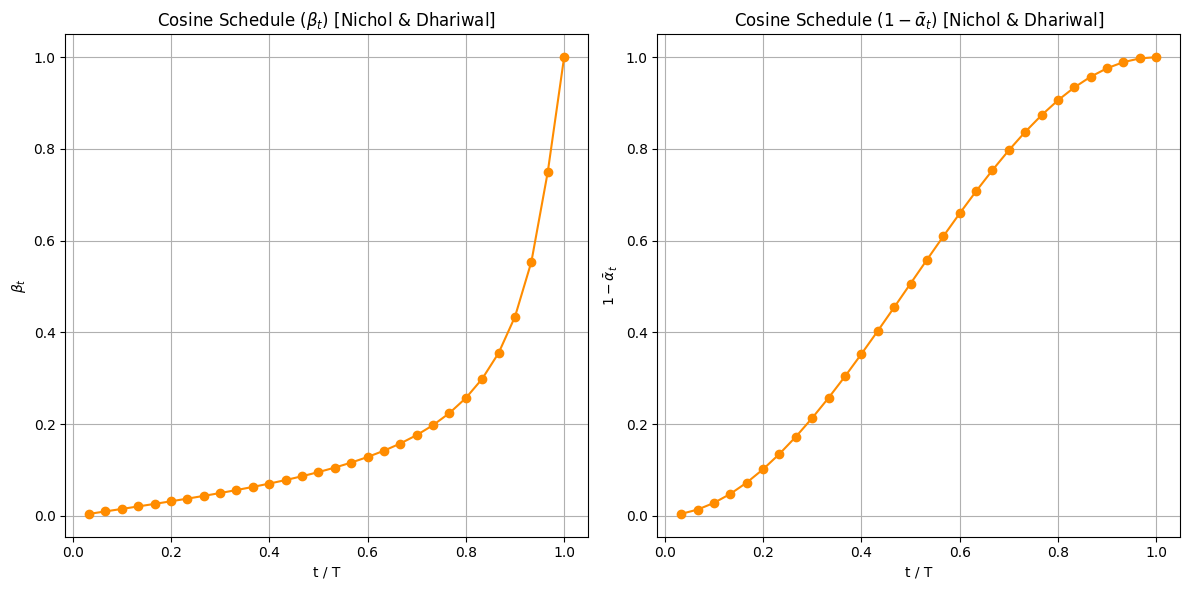

In [3]:
### write your code here
s = 0.008
T = 30
timesteps = np.arange(0, T + 1) 
t_over_T = timesteps / T

f_t = np.cos((t_over_T + s) / (1 + s) * np.pi / 2) ** 2

alpha_bar = f_t / f_t[0] 

alpha = alpha_bar[1:] / alpha_bar[:-1]
beta = 1 - alpha

plot_timesteps = t_over_T[1:]
one_minus_alpha_bar = 1 - alpha_bar[1:]

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(plot_timesteps, beta, label="cosine ($s=0.008$)", color='darkorange', marker='o')
plt.title(r"Cosine Schedule ($\beta_t$) [Nichol & Dhariwal]")
plt.xlabel("t / T")
plt.ylabel(r"$\beta_t$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(plot_timesteps, one_minus_alpha_bar, label="cosine ($s=0.008$)", color='darkorange', marker='o')
plt.title(r"Cosine Schedule ($1 - \bar{\alpha}_t$) [Nichol & Dhariwal]")
plt.xlabel("t / T")
plt.ylabel(r"$1 - \bar{\alpha}_t$")
plt.grid(True)

plt.tight_layout()
plt.show()


# Submission Guideline for Part 2

Please include your answer to all problems, including formulas, proofs, and the figures generated in each problem, excluding code. You are required to submit the (single) pdf and all (four) notebooks (one for each problem) with your code and running outputs. Do not include code in the pdf file. 

Specifically, for Problem 1 in this notebook, the pdf should contain:
- Formulas and proofs for problem 1.1 and 1.2
- 4 figures, one for each beta schedule for problem 1.3
- Answers to the 2 short answer questions about different beta schedules in problem 1.3